#Exploratory Data Analysis of Amazon Deliveries

#Table of Contents
 #Introduction
    #Objective and Scope of Analysis
    #Overview of Dataset
 #Data Preparation
    #Handling Missing Values
    #Data Type Conversion
    #Removing Outliers
    #Creating Derived Columns (e.g., Age Range, Rating Type)
 #Univariate Analysis
    #Distribution of Delivery Vehicles (Pie Chart)
 #Bivariate and Multivariate Analysis
    #Delivery Time by Location Type (Violin Plot)
    #Delivery Time Density by Age Range (KDE Plot)
    #Delivery Time by Traffic Levels (Histogram)
    #Agent Ratings vs Delivery Time (Scatter Plot)
    #Delivery Time by Weather Condition (Box Plot)
    #Delivery Time by Area Type (Box Plot)
 #Key Insights
    #Summary of Findings from Visualizations
    #Potential Factors Impacting Delivery Time
 #Conclusions and Recommendations
    #Actionable Suggestions for Optimizing Delivery Times
    #Areas for Further Research

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Amazon Delivery Analysis

## 1. Introduction
The Amazon delivery dataset was analyzed to understand key indicators that influence delivery times. 
Decreasing delivery times creates positive customer experiences and greater satisfaction. Identifying factors that influence delivery times can provide insights into low customer satisfaction and motivate productivity improvements.

## 2. Data Preparation
Minimal preprocessing was required for the dataset:
- Dropped rows with missing values.
- Converted data types for certain features.
- Binned `Agent_Age` and `Agent_Rating` into categories for grouped analysis.

In [371]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('amazon_delivery.csv')

In [372]:
data.describe(include='all')
data = data.dropna() 

data['Traffic'].astype("string")
data['Traffic'] = data['Traffic'].str.strip()

# drop age outliers
data.drop(data[data['Agent_Age'] > 40].index, inplace=True)
data.drop(data[data['Agent_Age'] < 17].index, inplace=True)

bins = [18, 22, 26, 30, 34, 38, 42]
labels = ['18-22', '22-26', '26-30', '30-34', '34-38', '38-42']
data['Age_Range'] = pd.cut(data['Agent_Age'], bins=bins, labels=labels, right=False)

bins=[2.5,3.0,3.5,4.0,4.5,5.0]
labels=['2.5-3.0','3.0-3.5','3.5-4.0','4.0-4.5','4.5-5.0']
data['Rating_Type'] = pd.cut(data['Agent_Rating'], bins=bins, labels=labels, right=False)

## 3. Univariate Analysis
Vehicle Usage: Shows the proportion of deliveries completed by different vehicle types using a pie chart.
## 4. Bivariate and Multivariate Analysis
Delivery Time by Location Type: Analyzes central tendencies and variations in delivery times across Urban, Metropolitan, and Semi-Urban areas using a violin plot.
Age Range and Delivery Time: Identifies trends in delivery efficiency by agent age using a KDE plot.
Traffic Impact on Delivery Time: Investigates how varying traffic levels (Low, Medium, High, Jam) influence delivery times using a histogram.
Agent Ratings and Delivery Time: Examines the relationship between delivery speed and agent ratings using a scatter plot, focusing on clusters and gaps in ratings.
Weather Impact on Delivery Time: Uses box plots to reveal how weather conditions affect delivery efficiency, highlighting mean and variation.
Area Type and Delivery Time: Compares delivery times across different area types, emphasizing distance and infrastructure impact.

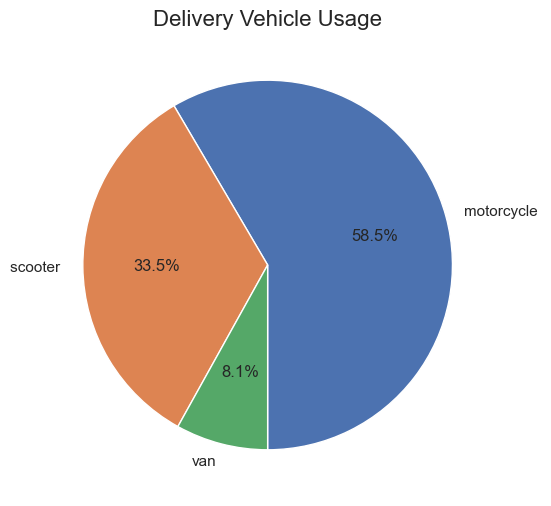

In [373]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
vehicle_counts = data['Vehicle'].value_counts()

plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=270)
plt.title("Delivery Vehicle Usage", fontsize=16)
plt.show()

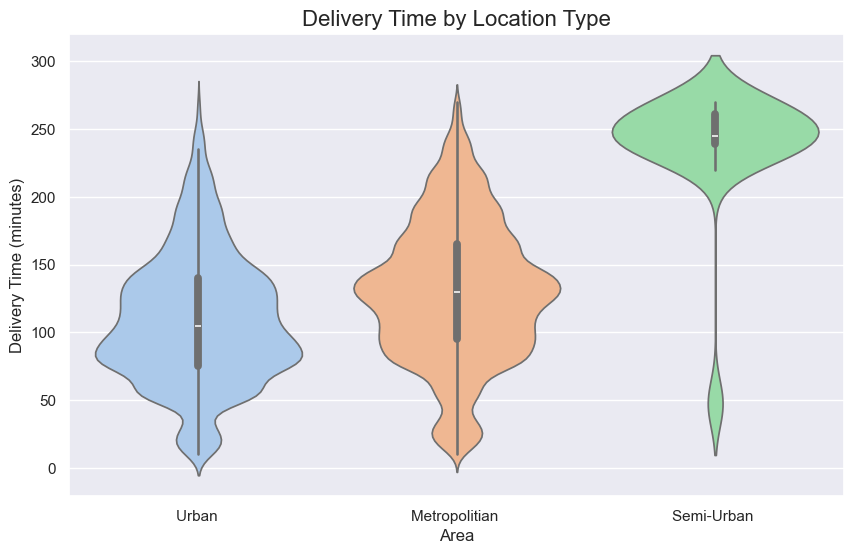

In [374]:
filtered_data = data[~data['Area'].isin(['Other'])]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, y='Delivery_Time', x='Area', hue='Area', palette="pastel")

plt.title("Delivery Time by Location Type", fontsize=16)
plt.ylabel("Delivery Time (minutes)", fontsize=12)
plt.show()

From the Violin plots we can see that Urban and Metropolitan have central tendencies that are lower delivery times.
Whereas Semi-Urban has a very high concentration of long delivery times. We can also see that Semi-Urban deliveries are either very long or very short 
delivery times with very little middle ground. This data could be effected by the weather, delivery vehicle type as well as distance from distribution
facility.


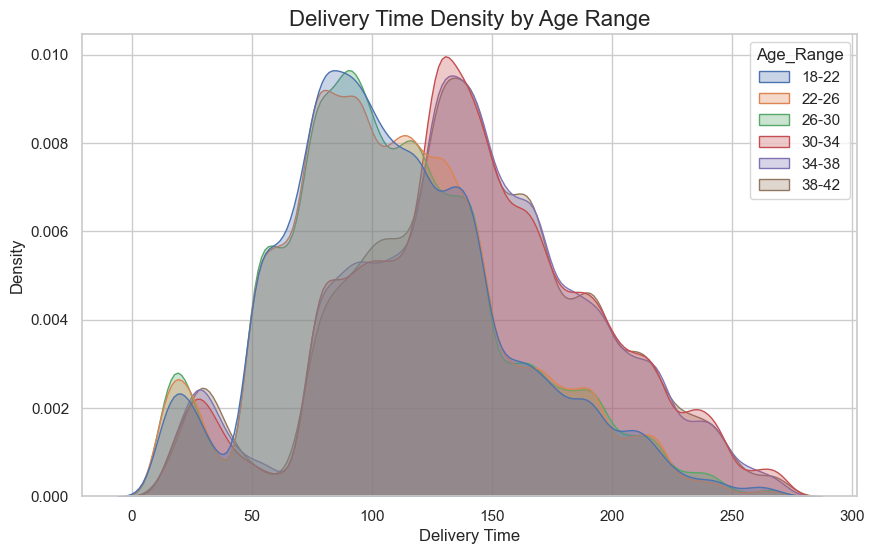

In [375]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x='Delivery_Time',
    hue='Age_Range',
    fill=True,
    common_norm=False,
    alpha=0.3,
    bw_adjust=0.6
)

plt.title('Delivery Time Density by Age Range', fontsize=16)
plt.xlabel('Delivery Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

From the graph below we can see that agents who are younger tend to deliver packages quicker compared to their older counterparts.
Across the graph we can see that younger agents are delivering packages quicker.

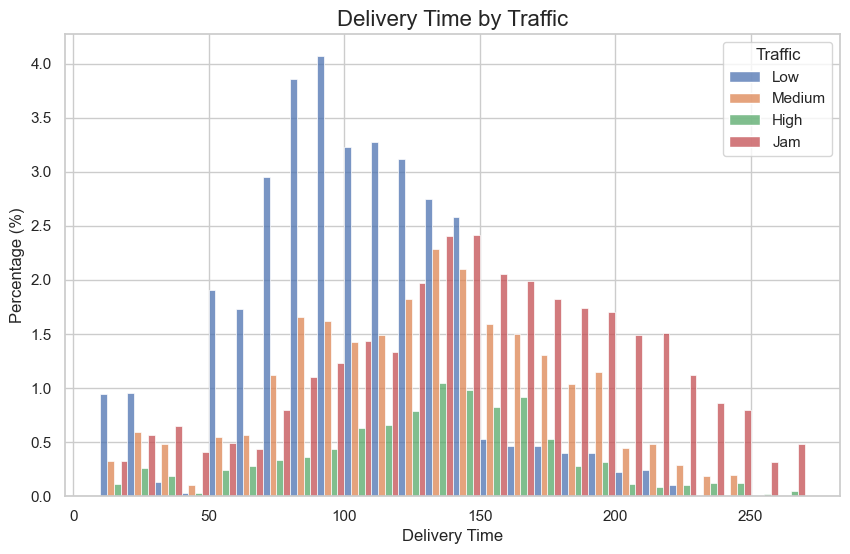

Traffic
High      129.456451
Jam       147.748505
Low       101.352965
Medium    126.835029
Name: Delivery_Time, dtype: float64


In [376]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data, x="Delivery_Time", hue='Traffic', stat="percent", multiple='dodge', binwidth=10, hue_order=['Low','Medium','High','Jam'])
plt.title('Delivery Time by Traffic', fontsize=16)
plt.xlabel('Delivery Time', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

averages = data.groupby("Traffic")['Delivery_Time'].mean()
print(averages)

Now we can see the distribution of Delivery Time by Traffic Distribution.
Notice, that low traffic has a mean of 101 minutes, medium a mean of 127 minutes, high with 129 minutes, lastly Jam with 148 minutes on average.
Traffic is a good indicator of delivery time.
Traffic could be related to vehicle type, so changing the method of delivery could result in lower delivery times.

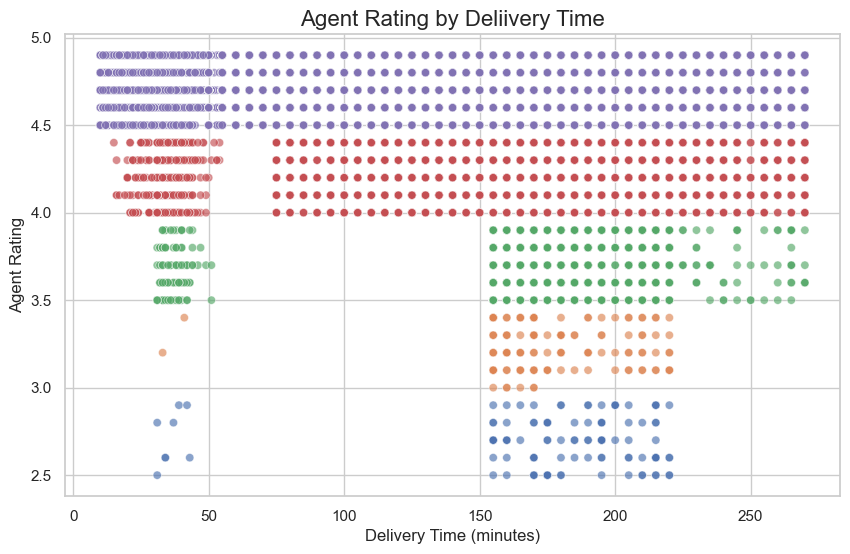

In [377]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.scatterplot(data=data, x='Delivery_Time', y='Agent_Rating', hue='Rating_Type',legend=False, alpha=0.65)
plt.title("Agent Rating by Deliivery Time", fontsize=16)
plt.xlabel("Delivery Time (minutes)", fontsize=12)
plt.ylabel("Agent Rating", fontsize=12)
plt.show()

Notice that there is a gap in the rating between 50-150 minutes for ratings below 4 stars.
This may suggest that a rating between 4-5 stars is more likely to be rated when the delivery is made between 50-150 minutes.
Also, notice that the clustering of ratings for 3.5 stars and greater is the most dense at less than 50 minutes of delivery time.

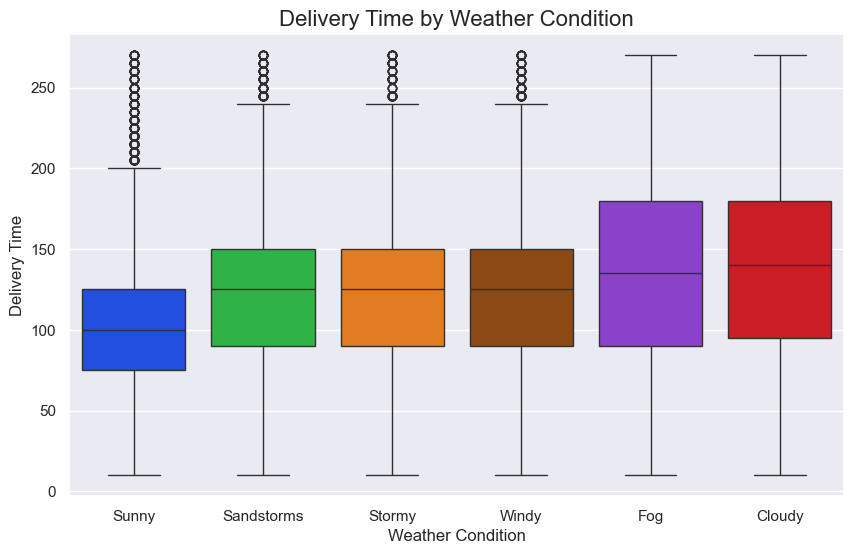

In [378]:
weather_means = data.groupby("Weather")['Delivery_Time'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")

sns.boxplot(data=data, x="Weather", y="Delivery_Time", hue="Weather", 
            palette="bright", order=weather_means.index)  # Reorder by the mean
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Delivery Time", fontsize=12)
plt.title("Delivery Time by Weather Condition", fontsize=16)
plt.show()

Above, the box plots are ordered by mean delivery time grouped by weather condition.
It appears that the mean time for delivery by weather condition can be indicated by visibility.
Where weather conditions with greater visibility allow for faster delivery times.

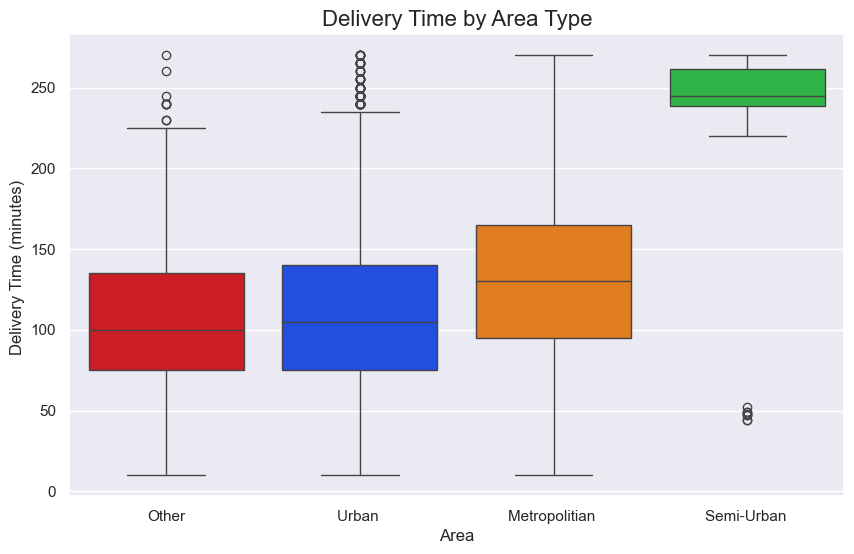

In [379]:
area_means = data.groupby("Area")['Delivery_Time'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")

sns.boxplot(data=data, x="Area", y='Delivery_Time', hue="Area", palette='bright', order=area_means.index)
plt.ylabel("Delivery Time (minutes) ", fontsize=12)
plt.title("Delivery Time by Area Type", fontsize=16)
plt.show()

Above, the box plots are ordered by mean delivery time grouped by area type.
Urban and "Other" areas tend to have lower delivery times between 75  and 130 minutes. 
Whereas Metropolitan average slightly higher at about 125 minutes average.
Lastly, semi-urban areas tend to have the highest delivery time with an average slightly below 250 minutes.
The delivery times could be the greatly influenced by the distance from the delivery site to the delivery center.

## 5. Key Insights
Urban and metropolitan areas have shorter delivery times.
Traffic and weather significantly impact delivery efficiency.
Younger agents and certain weather conditions contribute to faster deliveries.
High ratings are often associated with quicker deliveries.

## 6. Conclusions and Recommendations
From the findings of the dataset I would recommend optimizing routes for Semi-Urban delivery areas. As well as traffic scheduling for lower periods of activity to reduce delays due to traffic. I would also suggest equipment that improves driver`s visibility to improve delivery efficiency in harsh weather conditions.
